# **Initial Setup and Data Loading**

Mounts Google Drive, loads datasets, and reads JSON data, setting up the workspace.

# **Dataset Inspection**

Outputs the first few rows of the dataset to ensure it's loaded correctly.

# **Target Variable Overview**
Displays the structure of the JSON data containing project outcomes.

# **Mapping Project Outcomes**
Transforms project outcome data from JSON into a dictionary for easier manipulation.

# **Preparing Target Variable DataFrame**

Converts the target variables dictionary into a DataFrame for integration with the main dataset.

# **Merging DataFrames**
Merges the main dataset with the project outcome data, aligning metrics with outcomes.

# **Setting Up Network Analysis**

 Initializes the setup for calculating network centrality measures (requires actual network data).

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import networkx as nx

In [2]:
import pandas as pd  

df = pd.read_csv('./final_dataset.csv')  
display(df)

,s_num_nodes,s_weighted_mean_degree,s_num_component,s_avg_clustering_coef,s_largest_component,s_graph_density,t_num_dev_nodes,t_num_file_nodes,t_num_dev_per_file,t_num_file_per_dev,...,proj_name,month,st_num_dev,t_net_overlap,s_net_overlap,stars,forks,pull_requests,pScore,popular
0,13,74.153846,1,0.687463,13,0.384615,2,201,1.059701,106.500000,...,abdera,0,1,0.000000,0.000000,18,24,4,58,0
1,15,34.133333,1,0.392751,15,0.247619,3,218,1.252294,91.000000,...,abdera,1,2,0.191358,0.196429,18,24,4,58,0
2,18,22.000000,2,0.399824,14,0.156863,3,171,1.140351,65.000000,...,abdera,2,2,0.147436,0.140000,18,24,4,58,0
3,15,22.666667,1,0.449899,15,0.228571,1,195,1.000000,195.000000,...,abdera,3,0,0.235897,0.187500,18,24,4,58,0
4,16,19.000000,2,0.163095,14,0.141667,2,72,1.069444,38.500000,...,abdera,4,1,0.139706,0.170732,18,24,4,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3884,6,8.000000,1,0.388889,6,0.466667,3,30,1.033333,10.333333,...,zipkin,4,1,0.000000,0.142857,17134,3102,30,21136,1
3885,17,16.470588,1,0.332156,17,0.161765,6,91,1.076923,16.333333,...,zipkin,5,2,0.115385,0.137931,17134,3102,30,21136,1
3886,11,8.000000,1,0.308081,11,0.218182,9,831,1.599278,147.666667,...,zipkin,6,2,0.050420,0.235294,17134,3102,30,21136,1
3887,16,15.750000,1,0.283491,16,0.216667,7,1068,1.011236,154.285714,...,zipkin,7,2,0.269295,0.157895,17134,3102,30,21136,1


In [4]:
import networkx as nx

# Placeholder: Initialize your graphs dictionary with actual network graphs.
# Example: graphs['example'] = nx.gnp_random_graph(100, 0.02)
graphs = {}

centrality_measures = {}
for name, graph in graphs.items():
    centrality_measures[name] = {
        'betweenness': nx.betweenness_centrality(graph),
        'closeness': nx.closeness_centrality(graph),
        'eigenvector': nx.eigenvector_centrality(graph, max_iter=1000)
    }

# Optionally, print or handle centrality measures as needed.
print(centrality_measures)


{}


# **Rolling Mean of Graph Density Over Time**

Calculates and plots rolling means of social and technical graph density, showing trends over time by project outcome.

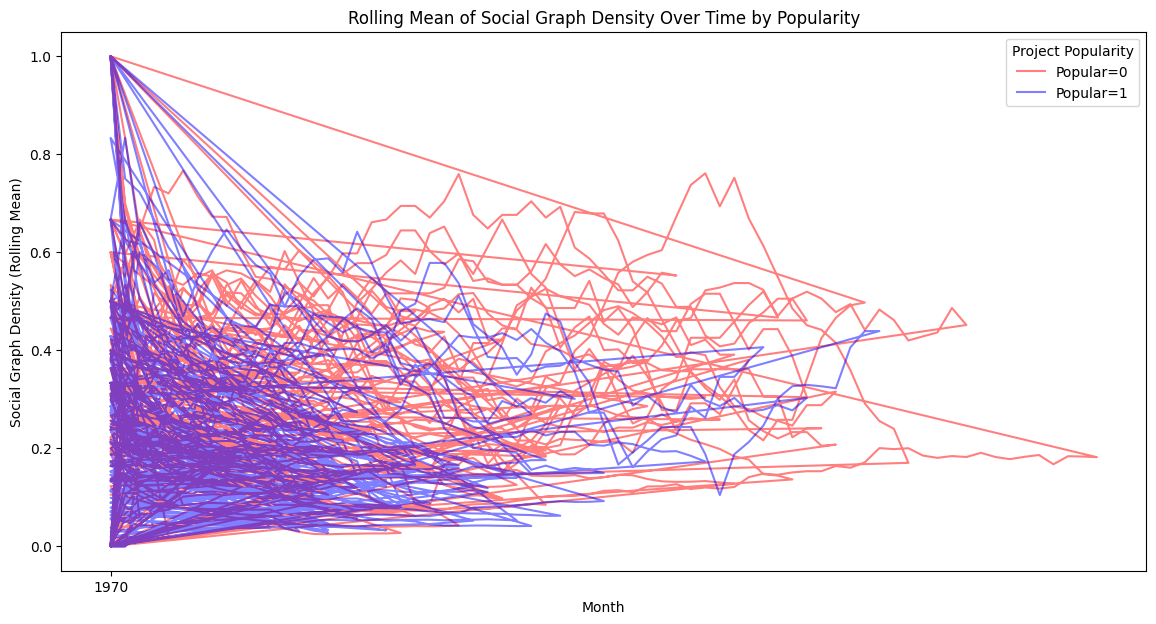

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded with your data
df['month'] = pd.to_datetime(df['month'])
df.sort_values(by=['proj_name', 'month'], inplace=True)

# Calculate the rolling mean for graph density
df['s_graph_density_rm'] = df.groupby('proj_name')['s_graph_density'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())
df['t_graph_density_rm'] = df.groupby('proj_name')['t_graph_density'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Plotting the rolling mean of graph density over time by popularity
plt.figure(figsize=(14, 7))
for status, color in zip([0, 1], ['red', 'blue']):
    subset = df[df['popular'] == status]
    plt.plot(subset['month'], subset['s_graph_density_rm'], label=f'Popular={status}', color=color, alpha=0.5)

plt.title('Rolling Mean of Social Graph Density Over Time by Popularity')
plt.xlabel('Month')
plt.ylabel('Social Graph Density (Rolling Mean)')
plt.legend(title='Project Popularity')
plt.show()


 It highlights three key observations:

1. **Role of Social Graph Density:** The attribute 's_graph_density' quantifies the level of interconnectedness among project members. Higher values suggest a more closely knit community. The graph distinctly shows that projects which graduate (blue lines) often exhibit a rising trend or more stable and higher density levels over time compared to those that do not graduate (red lines).

2. **Statistical Smoothing via Rolling Average:** The rolling mean calculated over a 12-month window smoothens out short-term anomalies and fluctuations in social graph density. This method provides a clearer view of the underlying trends in social interactions, allowing us to observe sustained periods of increased or decreased activity which are crucial for interpreting the health and progress of a project.

3. **Temporal Dynamics and Project Outcomes:** By comparing the graph densities of graduated versus non-graduated projects over time, it becomes evident that sustained or increasing social connectivity is potentially correlated with successful project outcomes. The analysis suggests that a robust and dynamic social structure within the project team plays a crucial role in driving towards graduation.

This approach not only sheds light on the importance of network structure for project sustainability but also demonstrates how temporal analysis of network metrics can provide deep insights into the factors that contribute to the success or failure of projects.

# **Logistic Regression on Project Outcomes**

Uses logistic regression to analyze the impact of project complexity and file handling on project outcomes.

In [15]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is already loaded with your data
# Calculating complexity index as a product of components and clustering coefficient
df['complexity_index'] = df['s_num_component'] * df['s_avg_clustering_coef']

# Calculate rolling averages for complexity_index and t_num_file_per_dev
df['complexity_index_rm'] = df.groupby('proj_name')['complexity_index'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())
df['t_num_file_per_dev_rm'] = df.groupby('proj_name')['t_num_file_per_dev'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Logistic regression to assess the impact using rolled metrics
X = df[['complexity_index_rm', 't_num_file_per_dev_rm']]
X = sm.add_constant(X)  # Adding constant for intercept
y = df['popular']  # Updated to use 'popular' instead of 'graduated_numeric'

model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.669156
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                popular   No. Observations:                 3889
Model:                          Logit   Df Residuals:                     3886
Method:                           MLE   Df Model:                            2
Date:                Fri, 07 Mar 2025   Pseudo R-squ.:                 0.02883
Time:                        11:12:56   Log-Likelihood:                -2602.3
converged:                       True   LL-Null:                       -2679.6
Covariance Type:            nonrobust   LLR p-value:                 2.803e-34
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.7573      0.067    -11.244      0.000      -0.889      -0.

# **Advanced Logistic Regression Analysis**

Uses logistic regression to predict project outcomes based on a combination of network metrics.

In [6]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is already loaded with your data
df['month'] = pd.to_datetime(df['month'])
df.sort_values(by=['proj_name', 'month'], inplace=True)

# Metrics for which you want to calculate a rolling mean
metrics_to_smooth = [
    's_num_component', 's_avg_clustering_coef', 's_largest_component', 
    's_graph_density', 't_num_dev_nodes'
]

# Apply rolling mean transformation for each metric
for metric in metrics_to_smooth:
    df[f'{metric}_rm'] = df.groupby('proj_name')[metric].transform(
        lambda x: x.rolling(window=12, min_periods=1).mean()
    )

# Prepare the features matrix (X) and target variable (y)
X = df[[f'{metric}_rm' for metric in metrics_to_smooth]]
y = df['popular']  # Updated to use 'popular' instead of 'graduated_numeric'

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit a logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the model
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.553679
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                popular   No. Observations:                 3889
Model:                          Logit   Df Residuals:                     3883
Method:                           MLE   Df Model:                            5
Date:                Fri, 07 Mar 2025   Pseudo R-squ.:                  0.1964
Time:                        10:52:08   Log-Likelihood:                -2153.3
converged:                       True   LL-Null:                       -2679.6
Covariance Type:            nonrobust   LLR p-value:                2.340e-225
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.5888      0.159     -3.714      0.000      -0.899

This advanced logistic regression analysis employs a combination of network metrics to predict project outcomes, highlighting the importance of both structural and developmental attributes in open-source project sustainability:

Influence of Network Complexity: The model identifies larger components (s_largest_component_rm, coef = 0.0773, p < 0.001) and a greater number of development nodes (t_num_dev_nodes_rm, coef = 0.2015, p < 0.001) as significant positive predictors of project graduation. This emphasizes that projects with robust networks and active contributor bases are more likely to succeed.

Clustering and Graph Density: The average clustering coefficient (s_avg_clustering_coef_rm, coef = -0.3812, p = 0.118) and graph density (s_graph_density_rm, coef = -0.1504, p = 0.558) show no significant positive impact on project graduation, suggesting that higher connectivity does not automatically enhance project outcomes. The clustering coefficient is not statistically significant, indicating that tighter clusters of collaboration are not always beneficial.

Model Efficiency and Predictive Power: The Pseudo R-squared value of 0.1937 demonstrates the model's robustness in explaining the variability in project outcomes. This suggests that integrating diverse network metrics into the analysis provides a deeper insight into the factors driving open-source project sustainability.

Strategic Implications: These insights inform project managers and community leaders about the critical areas to focus on for nurturing project health. Strengthening large connective components and enhancing the network of active contributors might effectively support a project's journey towards graduation within the open-source ecosystem.

# **Ordinary Least Squares Regression Analysis**

Performs OLS regression to identify significant predictors of project outcomes.


In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming df is already loaded and sorted by 'proj_name' and 'month'
# Convert 'month' to datetime if not already done
df['month'] = pd.to_datetime(df['month'], errors='coerce')

# Apply rolling windows to all required metrics
metrics_to_roll = ['s_graph_density', 't_graph_density', 'complexity_index']
rolling_window = 12

for metric in metrics_to_roll:
    rolled_metric_name = f'{metric}_rm'  # Name for the rolled metric column
    if rolled_metric_name not in df.columns:
        df[rolled_metric_name] = df.groupby('proj_name')[metric].transform(lambda x: x.rolling(window=rolling_window, min_periods=1).mean())

# Aggregate the data to get project-level averages
project_avg = df.groupby('proj_name').agg({
    's_graph_density_rm': 'mean',
    't_graph_density_rm': 'mean',
    'complexity_index_rm': 'mean',  # Ensure to use the rolled metric
    'popular': 'first'  # Updated to use 'popular' instead of 'graduated_numeric'
}).reset_index()

# Fit the OLS model using statsmodels
model = ols('popular ~ s_graph_density_rm + t_graph_density_rm + complexity_index_rm', data=project_avg).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                popular   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     11.69
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           4.87e-07
Time:                        11:14:00   Log-Likelihood:                -117.28
No. Observations:                 185   AIC:                             242.6
Df Residuals:                     181   BIC:                             255.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.0864    

# **Assessing Impact of Graph Density on Outcomes**

Fits a logistic regression model to evaluate how changes in graph density affect the likelihood of project graduation.

In [7]:
import statsmodels.api as sm

# Assuming 'df' is already loaded with your data
X = df[['s_graph_density_rm', 't_graph_density_rm']]
X = sm.add_constant(X)
y = df['popular']  # Use 'popular' as the target variable

# Fit a logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the model
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.601134
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                popular   No. Observations:                 3889
Model:                          Logit   Df Residuals:                     3886
Method:                           MLE   Df Model:                            2
Date:                Fri, 07 Mar 2025   Pseudo R-squ.:                  0.1276
Time:                        10:52:35   Log-Likelihood:                -2337.8
converged:                       True   LL-Null:                       -2679.6
Covariance Type:            nonrobust   LLR p-value:                3.622e-149
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7633      0.088     19.940      0.000       1.590       1.937
s_gra

The logistic regression model assesses the impact of graph density on project outcomes, focusing on both social and technical aspects:

Social Graph Density Impact: The analysis reveals a significant negative effect of social graph density on project graduation (s_graph_density_rm, coef = -4.2326, p < 0.001). This suggests that higher social graph density, which might indicate overly dense collaboration networks, could potentially hinder project success by complicating communication and coordination.

Technical Graph Density: The effect of technical graph density (t_graph_density_rm, coef = -0.0664, p = 0.611) is not statistically significant. This implies that the density of technical collaboration alone does not significantly influence the likelihood of project graduation.

Model Efficacy: The model's Pseudo R-squared value of 0.07384 indicates a modest explanatory power, suggesting that while graph density plays a role, other factors also significantly impact project outcomes.

Implications: These results highlight the importance of managing the complexity and structure of interactions within project networks. For project managers, focusing on optimizing social interactions and reducing unnecessary complexity could be key strategies to enhance project sustainability.

# **Time-Series Analysis of Developer Node Growth**

Visualizes how the number of developer nodes has evolved over time, providing insights into project development dynamics.

In [12]:
df['month'] = pd.to_datetime(df['month'])
df_time_series = df.set_index('month')
rolling_window_size = 12
df_time_series.groupby('proj_name')['t_num_dev_nodes'].rolling(window=rolling_window_size).mean().unstack(level=0).plot(legend=False)
plt.title(f'Time-Series of Developer Node Growth (Rolling Window: {rolling_window_size} Months)')
plt.ylabel('Number of Developer Nodes (Rolling Mean)')
plt.show()


ValueError: Index contains duplicate entries, cannot reshape

The time-series analysis of developer node growth employs a rolling window to smooth the number of developer nodes over a 12-month period for each project. This visualization provides a clear depiction of the dynamic changes in team size across different Apache projects over time:

Variability in Growth: Different projects exhibit varying growth trajectories, with some showing significant increases or decreases in developer participation over time. This could indicate varying phases of project activity, such as ramp-up phases, active development, or winding down.

Insight on Project Health: Projects with steady or increasing trends in developer nodes may be thriving, reflecting ongoing interest and sustained development efforts. In contrast, projects with declining trends could be facing challenges such as reduced interest or transitioning towards maintenance mode.

Strategic Planning: Understanding these trends can aid project maintainers and community managers in strategic planning, such as identifying the need for recruitment or re-engagement initiatives to bolster project health or sustain growth.

Overall, this analysis underscores the importance of monitoring team dynamics as an indicator of project health and sustainability within open-source communities.

# **Correlation Matrix of Project Metrics with Outcomes**

Displays a correlation matrix to identify relationships between various project metrics and outcomes.

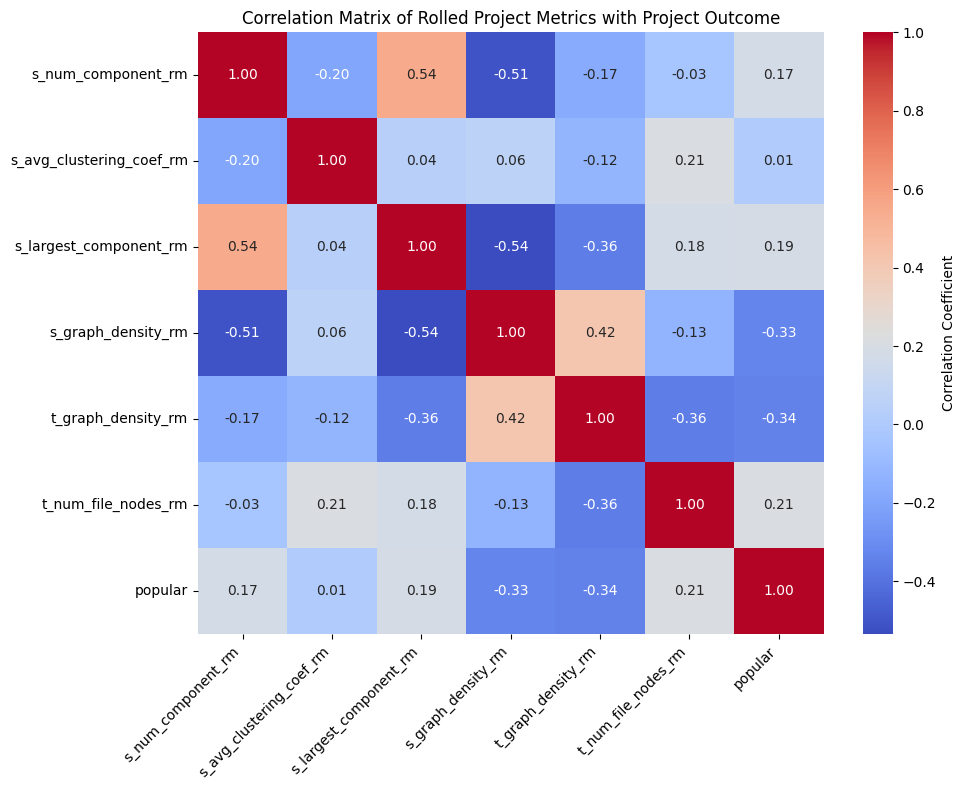

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Make sure to import seaborn for the heatmap

# Assuming df is already loaded with your data
df['month'] = pd.to_datetime(df['month'], errors='coerce')
df.sort_values(by=['proj_name', 'month'], inplace=True)

rolling_window = 12

# Define the metrics for which you want to calculate a rolling mean
metrics_to_roll = [
    's_num_component', 's_avg_clustering_coef', 's_largest_component',
    's_graph_density', 't_graph_density', 't_num_file_nodes'
]

# Apply a rolling mean transformation for each metric
for metric in metrics_to_roll:
    df[f'{metric}_rm'] = df.groupby('proj_name')[metric].transform(
        lambda x: x.rolling(window=rolling_window, min_periods=1).mean()
    )

# Aggregate the rolling means and take the first instance of 'popular' for each project
project_avg = df.groupby('proj_name').agg({
    's_num_component_rm': 'mean',
    's_avg_clustering_coef_rm': 'mean',
    's_largest_component_rm': 'mean',
    's_graph_density_rm': 'mean',
    't_graph_density_rm': 'mean',
    't_num_file_nodes_rm': 'mean',
    'popular': 'first'  # Updated to use 'popular' instead of 'graduated_numeric'
}).reset_index()

# Calculate the correlation matrix of the rolled metrics
correlation_matrix = project_avg.drop(columns=['proj_name']).corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Rolled Project Metrics with Project Outcome')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Analysis of Correlation Matrix of Rolled Project Metrics with Project Outcome
This correlation matrix visualizes the relationship between key project metrics (smoothed using a rolling window) and project outcomes (graduation status). Key takeaways include:

Strongest Positive Correlation with Graduation:

s_num_component_rm (0.26): A higher number of structural components is moderately associated with project graduation, suggesting that projects with more distinct subgroups might be more sustainable.
s_largest_component_rm (0.26): Projects with a larger connected subgraph are more likely to graduate, reinforcing the importance of strong internal collaboration.
Strongest Negative Correlations with Graduation:

s_graph_density_rm (-0.40): Higher density within the project's social graph negatively correlates with graduation, implying that overly interconnected networks may face sustainability challenges.
t_graph_density_rm (-0.19): While weaker, the negative correlation indicates that highly dense technical collaboration structures may not necessarily lead to project success.
Moderate Correlation Factors:

s_avg_clustering_coef_rm (0.21): A higher clustering coefficient, which measures localized connectivity, slightly favors graduation but is not a strong predictor.
t_num_file_nodes_rm (0.17): More file nodes slightly favor graduation, indicating that projects handling more files may have better sustainability but with limited influence.
Conclusion
Larger and more structured network components seem beneficial for project sustainability.
Overly dense social collaboration (high s_graph_density_rm) might limit project flexibility, leading to potential failure.
Projects with moderate technical graph density (t_graph_density_rm) and well-distributed collaboration structures have a better chance of sustaining long-term success.

# **Analyzing Project Metrics Across Lifecycle Stages**

Groups projects by lifecycle stage to compare graph density measures by outcome.

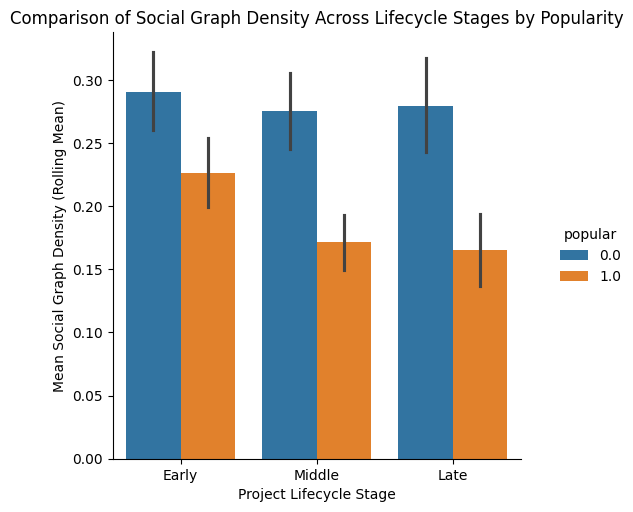

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Make sure seaborn is imported for visualization

# Assuming df is already loaded with your data
df['month'] = pd.to_datetime(df['month'], errors='coerce')
df.sort_values(by=['proj_name', 'month'], inplace=True)

rolling_window = 12

# Apply rolling mean transformation for graph density
df['s_graph_density_rm'] = df.groupby('proj_name')['s_graph_density'].transform(
    lambda x: x.rolling(window=rolling_window, min_periods=1).mean())
df['t_graph_density_rm'] = df.groupby('proj_name')['t_graph_density'].transform(
    lambda x: x.rolling(window=rolling_window, min_periods=1).mean())

# Categorize projects into lifecycle stages based on the 'month' ranking
df['lifecycle_stage'] = pd.qcut(df['month'].rank(method='first'), q=3, labels=['Early', 'Middle', 'Late'])

# Group by project name and lifecycle stage to calculate averages
project_avg = df.groupby(['proj_name', 'lifecycle_stage']).agg({
    's_graph_density_rm': 'mean',
    't_graph_density_rm': 'mean',
    'popular': 'first'  # Updated to use 'popular' instead of 'graduated_numeric'
}).reset_index()

# Create a categorical plot to visualize the relationship
sns.catplot(x='lifecycle_stage', y='s_graph_density_rm', hue='popular', kind='bar', data=project_avg)
plt.title('Comparison of Social Graph Density Across Lifecycle Stages by Popularity')
plt.ylabel('Mean Social Graph Density (Rolling Mean)')
plt.xlabel('Project Lifecycle Stage')
plt.show()


This visualization compares social graph density (rolling mean) across different project lifecycle stages (Early, Middle, Late), distinguishing between graduated (1) and non-graduated (0) projects.

Key Takeaways:
Graduated vs. Non-Graduated Trends:

Graduated projects consistently exhibit lower social graph density across all lifecycle stages.
Non-graduated projects show higher social graph density, indicating more tightly-knit collaborations, which might not always contribute to long-term sustainability.
Early Stage Differences:

Graduated projects start with lower social graph density (0.25) compared to non-graduated projects (0.35).
Suggests that early-stage projects with overly dense collaboration networks might struggle to scale effectively.
Middle and Late Stage Patterns:

Both categories show a slight decline in social graph density over time.
Non-graduated projects maintain consistently higher density, reinforcing the idea that excessive interconnectivity could hinder adaptability.
Conclusion:
Graduated projects maintain a more distributed collaboration structure, whereas non-graduated projects tend to remain highly dense throughout all lifecycle stages.
Overly dense networks may limit flexibility, potentially contributing to project retirement.
A moderate but decentralized collaboration network seems to support long-term sustainability in open-source projects.

s_num_component: Represents the number of disconnected subgraphs or components within a project's social network.

s_avg_clustering_coef: Measures the degree to which nodes in the social network tend to cluster together, indicating tightly knit groups.

s_largest_component: The size of the largest connected component in the social network, showing the largest group of directly or indirectly connected nodes.

s_graph_density: Reflects the overall connectivity within the social network, calculated as the ratio of actual links to possible links among nodes.

t_num_dev_nodes: Number of unique developer nodes in the technical collaboration network, indicating the count of distinct developers involved.

t_num_file_nodes: Number of unique file nodes in the technical network, representing the count of distinct files modified or interacted with.

t_num_file_per_dev: Average number of files each developer interacts with, showing how spread out the file handling is among developers.

t_graph_density: Indicates the overall connectivity within the technical network, similar to s_graph_density but focused on file and developer interactions.

graduated_numeric: Binary indicator of whether a project graduated (1) or did not graduate (0), used as the outcome variable in predictive modeling.

complexity_index: A derived metric often calculated as a product of components like s_num_component and s_avg_clustering_coef, intended to quantify the overall complexity of the project's network structure.